# Week 2 - Assignament

**Code made for the course *Stochastic Processes: Data Analysis and Computer Simulation***

Made by Ricardo Miguel Leal Lopez.

In [75]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
jtplot.style(ticks=True, grid=False, figsize=(15, 7))

In [2]:
#Normal distribution
def normal(x,mu,sigma):
    exp=np.exp(-0.5*((x-mu)/sigma)**2)
    normal=1/(sigma*np.sqrt(2*np.pi))
    return normal*exp

#Binomial distribution
def binomial(x,p,n):
    D=(factorial(n))/(factorial(x)*factorial(n-x))
    F=((1-p)**(n-x))*(p**x)
    return D*F

#Función para el factorial
def factorial(x):
    f=1
    if x==0:
        return f
    else:
        for i in range(1,x+1):
            f=f*i
    return f #Se regresa f, que seria el factorial.

## Homework 2-2

Consider the following pseudo random number generator, which generates a new "random" number $X_{i+1}, from the previous number $X_i$, as:

\begin{equation}
X_{i+1}=mod(aX_i+b,M),
\end{equation}

with 'mod' the modulo operation, and $a$ and $M$ some constants (which should be very large numbers). 

This generator will give numbers within the range $(0,M-1)$. To obtain random numbers within the unit interval $\zeta_i\in [0,1]$, we set:

\begin{equation}
\zeta_i=X_i/M.
\end{equation}

Write a code to correctly implement this random number generator to compute 'ntotal' numbers $\zeta_i$ with an initial seed $X_0$.

In [35]:
def rng(seed,a,b,M,ntotal):
    data=np.zeros(ntotal)
    data[0]=seed #se pone el numero inicial con la semilla X_0
    for i in range(1,ntotal): #Se crea un ciclo for para los numeros.
        data[i]=np.mod((a*data[i-1]+b),M) #Se cumple con la ecuación mostrada.
    return data/np.float(M)             #Se regresa ahora la zeta_i

## Homework 2-3

Let us first examine the distribution of the random numbers which will be generated by the method explained in previous Homework. Using the correct 'rng' function defined in the previous problem, with $a=8121$, $b=28411$, $M=134456$, and initial value (seed) $X_0=123456$, generate a sequence of $5x10^5$ random numbers. Draw a histogram of these numbers.

In [36]:
#Primero llamamos la función usando los valores dados.

val=rng(seed=123456,a=8121,b=28411,M=134456,ntotal=500000)

#Checamos que sean 5x10^5 numeros. Para eso creamos un dataframe.
data=pd.DataFrame(val,columns=['Val. aleatorios'])
data

,Val. aleatorios
0,0.918189
1,0.822953
2,0.414515
3,0.485876
4,0.013715
...,...
499995,0.337248
499996,0.001279
499997,0.599921
499998,0.171075


Text(0, 0.5, '$P(\\zeta)$')

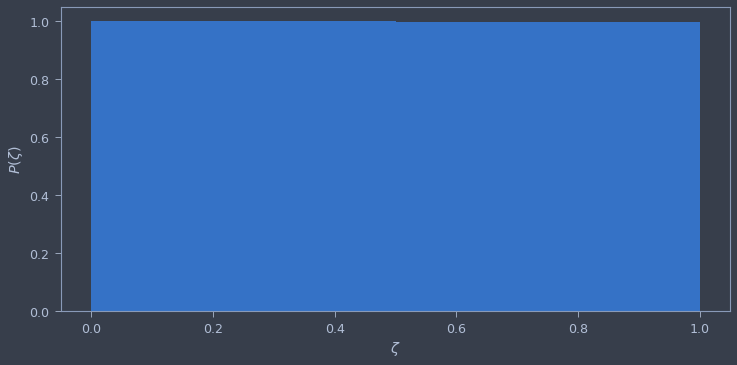

In [76]:
#Ahora, creamos el histograma. Tenemos:
mu=data.mean()
sigma=data.std()



nmin=np.int(mu-sigma*5)

nmax=np.int(mu+sigma*5)

nbins=np.int(nmax-nmin+1)


plt.figure()
plt.hist(val,bins=nbins,density=True)
plt.xlabel('$\zeta$')
plt.ylabel('$P(\zeta)$')

## Homework 2-4

Let us also examine the correlation. Use the code example introduced in Part 2, to compute the correlation function for the sequence of random numbers generated using the 'rng' function of Homework 2 and 3. Using the same parameters $(a,b,M)$ and seed $(X_0)$ as in Homework 3, generate $N=10^5$ random numbers and calculate the correlation function $\varphi(i)$. Plot the normalized correlation $\varphi(i)/\varphi(0)$ from $i=0$ to $i=8000$ and plot the solution.

In [60]:
#Volvemos a llamar la funcion random numbers generator (rng). Tenemos:

N=100000
datos=rng(seed=123456,a=8121,b=28411,M=134456,ntotal=N)

#Ahora, creamos el dataframe para los datos.
data=pd.DataFrame(datos,columns=['Val. aleatorios'])

data2=pd.Series(datos) #Para la autocorrelación.

data

,Val. aleatorios
0,0.918189
1,0.822953
2,0.414515
3,0.485876
4,0.013715
...,...
99995,0.130132
99996,0.011573
99997,0.192055
99998,0.893155


(-100.0, 8000.0)

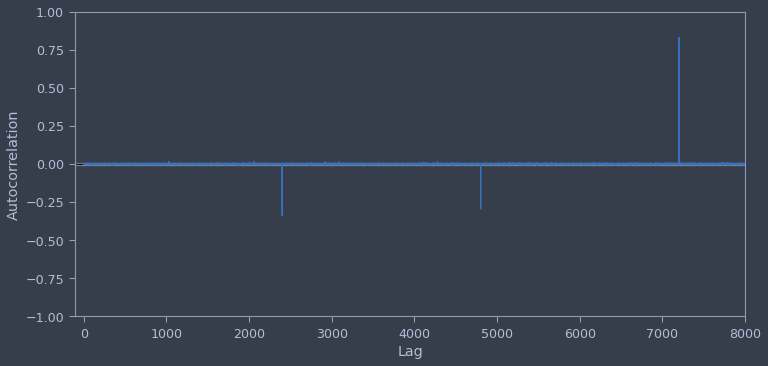

In [74]:
plt.figure()
pd.plotting.autocorrelation_plot(data2)
plt.xlim(-100,8000)

## Homework 2-5

Generate $N=10^5$ random numbers from a Gaussian distribution. Choose the closest values from below for the percentage of points that are within two standard deviations from the average.

(array([1.025000e-05, 1.025000e-05, 1.025000e-05, 0.000000e+00,
        3.075000e-05, 1.640000e-04, 2.767500e-04, 6.867500e-04,
        1.568250e-03, 2.952000e-03, 5.032750e-03, 8.958500e-03,
        1.430900e-02, 2.334950e-02, 3.420425e-02, 4.572525e-02,
        6.254550e-02, 7.522475e-02, 8.962600e-02, 9.673950e-02,
        1.001630e-01, 9.730325e-02, 8.805775e-02, 7.685450e-02,
        6.319125e-02, 4.723200e-02, 3.332275e-02, 2.353400e-02,
        1.453450e-02, 8.845750e-03, 5.289000e-03, 2.716250e-03,
        1.301750e-03, 6.765000e-04, 3.177500e-04, 1.640000e-04,
        6.150000e-05, 1.025000e-05, 0.000000e+00, 0.000000e+00,
        0.000000e+00]),
 array([-18.        , -17.02439024, -16.04878049, -15.07317073,
        -14.09756098, -13.12195122, -12.14634146, -11.17073171,
        -10.19512195,  -9.2195122 ,  -8.24390244,  -7.26829268,
         -6.29268293,  -5.31707317,  -4.34146341,  -3.36585366,
         -2.3902439 ,  -1.41463415,  -0.43902439,   0.53658537,
          1.5121

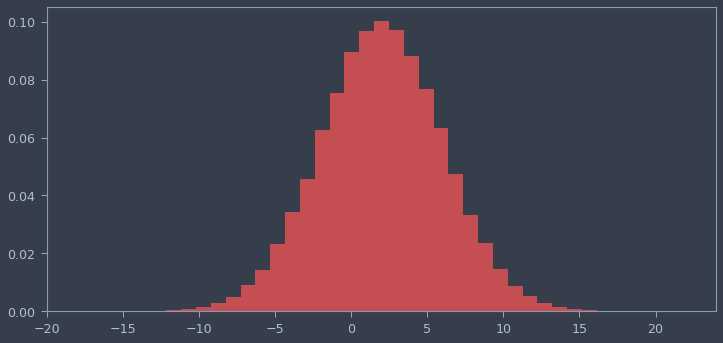

In [88]:
N=100000   #Son N=10^5 numeros.
np.random.seed(0) #La semilla inicial.

mu=2    #Valor arbitrario.
sigma=4 #Valor arbitrario.

X=np.random.normal(mu,sigma,N) #Obtenemos una distribución gaussiana.
#Ahora, graficamos para observar los datos.

nmin=np.int(mu-sigma*5); nmax=np.int(mu+sigma*5)
nbins=np.int(nmax-nmin+1)

plt.figure()
plt.hist(X,range=[nmin,nmax],bins=nbinscolor='r',density=True)

In [91]:
#Entonces, con el valor mu, podremos calcular dos distintas desviaciones estandar.
def standard(x,mu,N):
    return np.sqrt(x-mu)/N


sigma1=standard(10,mu,N)
sigma2=standard(13,mu,N)

## Homework 2-6
Imagine you have a distribution for a random variable that has a bell shape similar to that of a Gaussian. Looking at the distribution near the tails, you notice that $0.01%$ of the points are more than $5\sigma$ away from the average. Can you say that the distribution is Gaussian?

In [94]:
#Escogemos igualmente los valores de 10^5.
X=np.random.randn(N)
Nfuera=0

for i in range(N):
    if X[i]>5:
        Nfuera+=1
print(Nfuera/N)

0.0


 De este valor, sabemos que no seria una distribución gaussiana.